In [12]:
from utils import KvasirLabelImage
import tensorflow as tf
import os
import model as md
from tensorflow.keras import backend as K
import model as md
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [13]:
PATH = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))) + '/Input/' #PATH OF Dataset

In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/gsoc/Input/labeled-images/Images',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=1)

Found 10662 files belonging to 22 classes.
Using 2132 files for validation.


In [4]:
class_names = val_ds.class_names
print(class_names)

['barretts', 'barretts-short-segment', 'bbps-0-1', 'bbps-2-3', 'cecum', 'dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis-a', 'esophagitis-b-d', 'hemorrhoids', 'ileum', 'impacted-stool', 'pylorus', 'retroflex-rectum', 'retroflex-stomach', 'ulcerative-colitis-grade-0-1', 'ulcerative-colitis-grade-1', 'ulcerative-colitis-grade-1-2', 'ulcerative-colitis-grade-2', 'ulcerative-colitis-grade-2-3', 'ulcerative-colitis-grade-3', 'z-line']


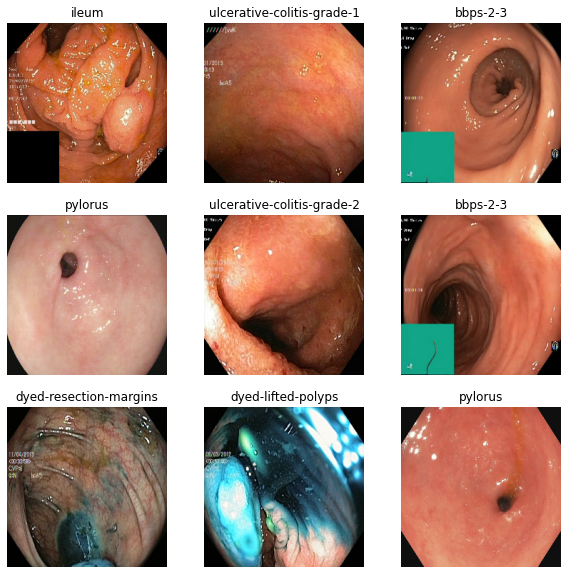

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
model_custom = None
model_pre = None

In [7]:
def load_model():
    """ Load Model """
    global model_custom
    global model_pre
    model_custom = tf.keras.models.load_model('/gsoc/Src/Custom-Model/lh-radiology-nn-vr-detection/Model-Store/ClassificationModel/CustomModel',custom_objects={'f1_m':md.Main_Model.f1_m,'precision_m':md.Main_Model.precision_m,'recall_m':md.Main_Model.recall_m})
    model_pre = tf.keras.models.load_model('/gsoc/Src/Custom-Model/lh-radiology-nn-vr-detection/Model-Store/ClassificationModel/preTrain',custom_objects={'f1_m':md.Main_Model.f1_m,'precision_m':md.Main_Model.precision_m,'recall_m':md.Main_Model.recall_m})

In [21]:
load_model()

In [41]:
y_pred = model_pre.predict(val_ds)
y_pred_bool = np.argmax(y_pred, axis=1)

In [80]:
final = [(np.argmax(model_pre.predict(x), axis=1),y) for x, y in val_ds]

In [90]:
y_preds = [a_tuple[0][0] for a_tuple in final]
y_tues = np.concatenate([a_tuple[1] for a_tuple in final], axis = 0)

In [92]:
accuracy_score(y_tues, y_preds)

0.7954971857410882

In [93]:
print(classification_report(y_tues, y_preds))

              precision    recall  f1-score   support

           0       0.10      0.80      0.17        10
           1       0.00      0.00      0.00        13
           2       0.98      0.96      0.97       126
           3       0.97      0.97      0.97       222
           4       0.98      0.98      0.98       206
           5       0.71      0.95      0.81       201
           6       0.92      0.71      0.80       215
           7       0.37      0.40      0.39        77
           8       0.65      0.44      0.52        55
           9       0.00      0.00      0.00         1
          10       0.78      0.95      0.86       186
          11       0.81      0.83      0.82        30
          12       0.98      0.99      0.99       202
          13       1.00      0.40      0.58        89
          14       0.95      0.99      0.97       149
          15       0.00      0.00      0.00         6
          16       0.40      0.43      0.42        46
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(classification_report(y_true,y_pred_bool))

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.00      0.00      0.00        13
           2       0.98      0.52      0.68       126
           3       0.76      0.99      0.86       222
           4       0.87      0.96      0.91       206
           5       0.73      0.24      0.37       201
           6       0.55      0.91      0.68       215
           7       0.29      0.35      0.32        77
           8       0.41      0.22      0.29        55
           9       0.00      0.00      0.00         1
          10       0.89      0.95      0.92       186
          11       0.89      0.53      0.67        30
          12       0.75      0.87      0.80       202
          13       0.91      0.54      0.68        89
          14       0.92      0.81      0.86       149
          15       0.00      0.00      0.00         6
          16       0.29      0.13      0.18        46
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
